In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
perm = np.eye(m)
half = round(m/2)
I = np.eye(m)
perm[:, ::2] = I[:, :half]
imshow(perm)
perm[:, 1::2] = I[:, half:]
imshow(perm)

NameError: name 'm' is not defined

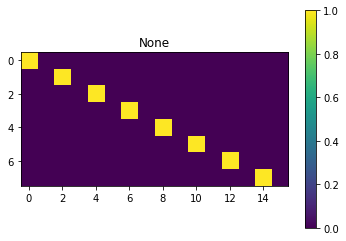

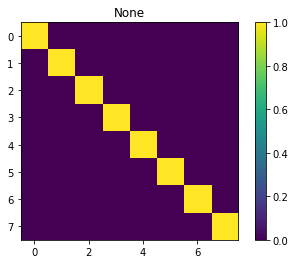

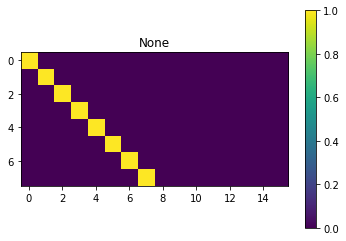

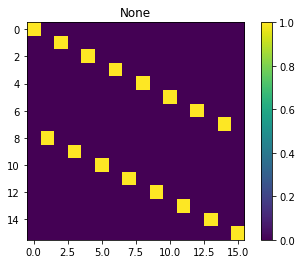

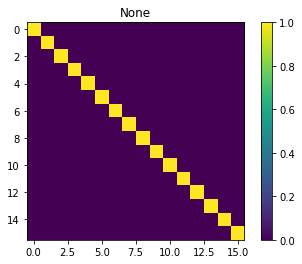

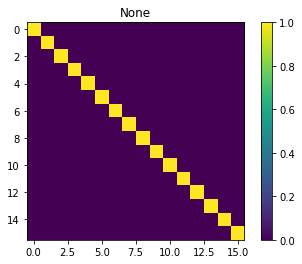

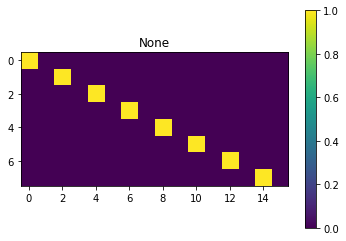

In [63]:
m = dimension
n = round(m/2)
H = np.eye(m)
H = H[::2]
imshow(H)

U = np.eye(n)
imshow(U)
S = np.eye(m)[:n]
imshow(S)
H_t = np.eye(m)
H_t = H_t[1::2]
VT = np.concatenate([H, H_t], axis=0)
imshow(VT)
imshow(VT @ VT.T)
imshow(VT.T @ VT)

H_reconstruct = U @ S @ VT
imshow(H_reconstruct)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


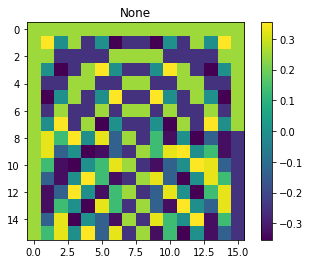

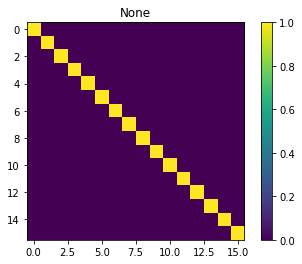

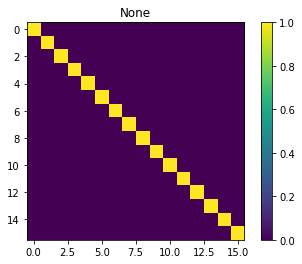

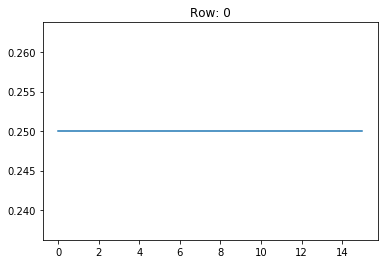

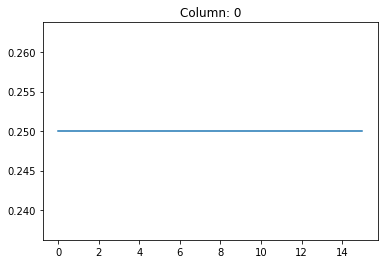

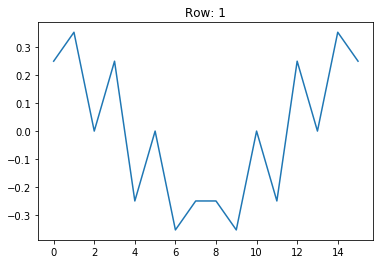

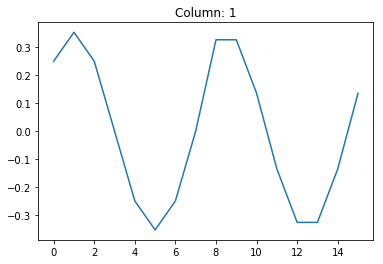

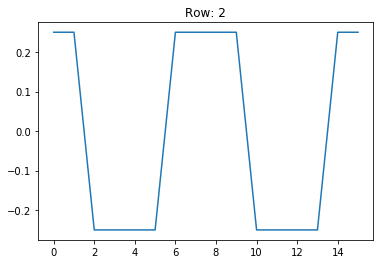

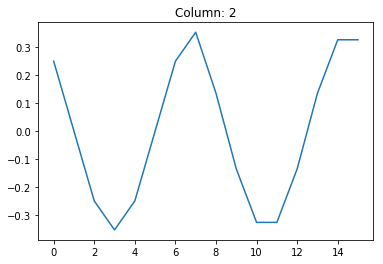

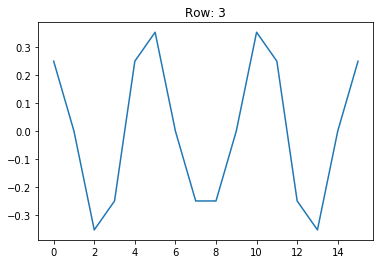

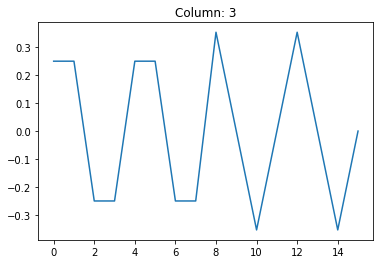

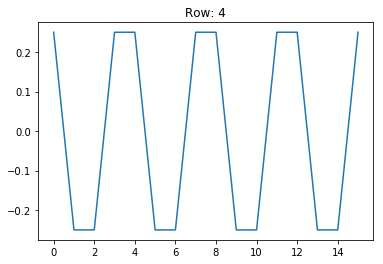

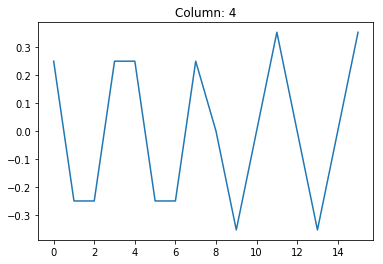

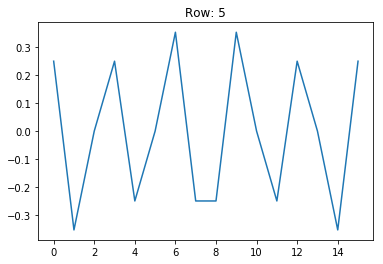

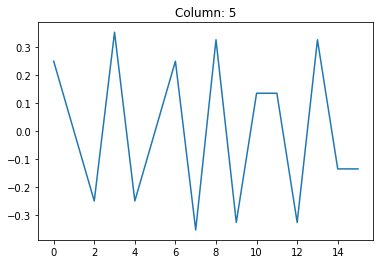

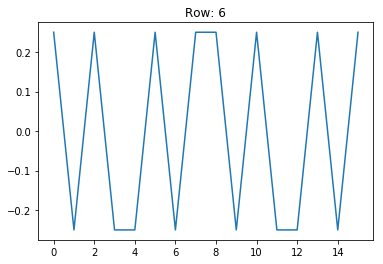

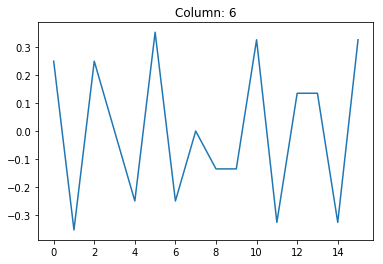

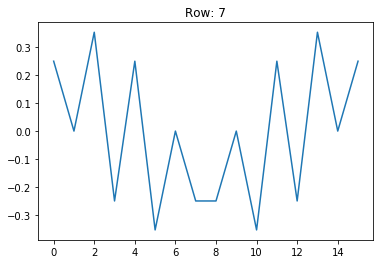

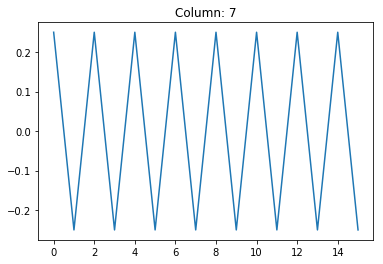

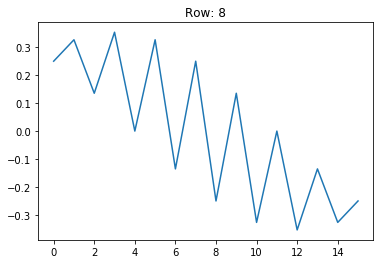

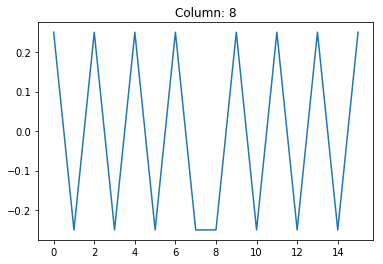

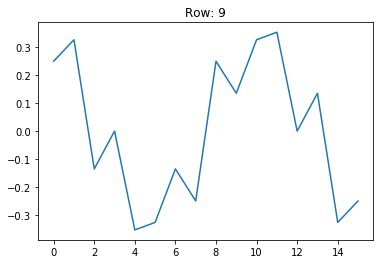

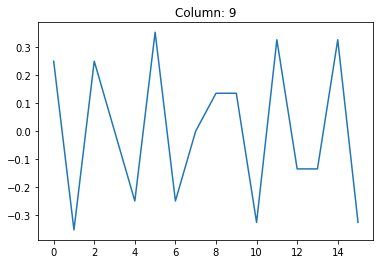

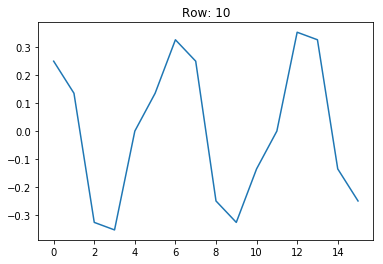

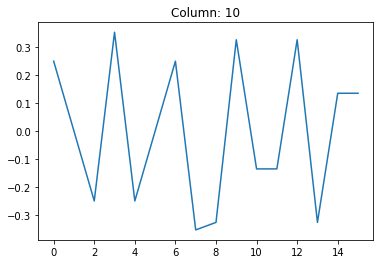

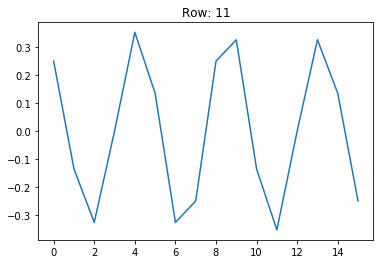

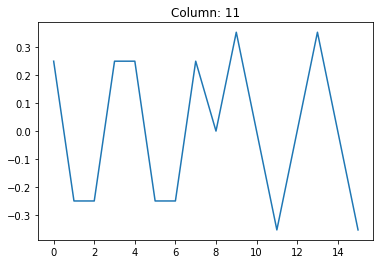

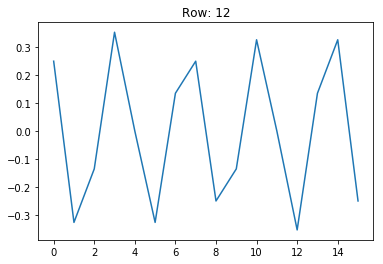

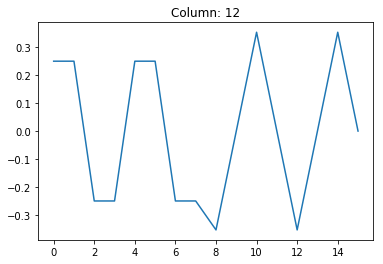

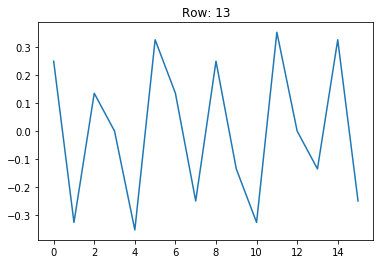

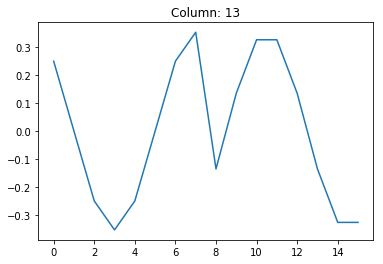

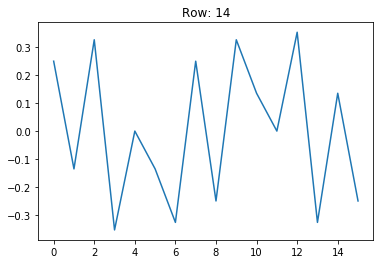

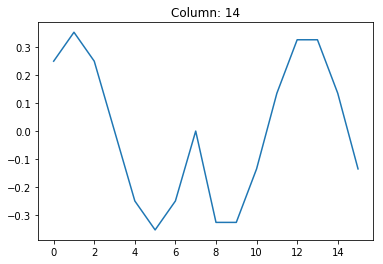

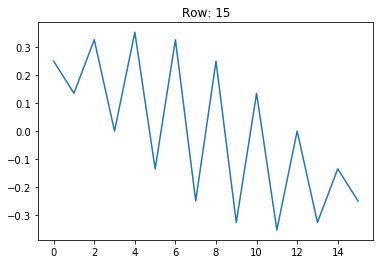

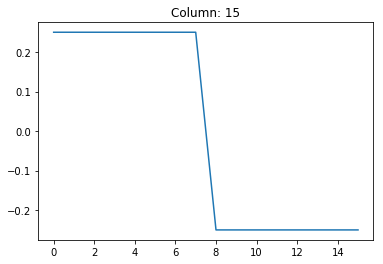

In [65]:
# this = S @ VT @ eig_vec
this = VT @ eig_vec

imshow(this)
imshow(this.T @ this)
imshow(this @ this.T)
for ii in range(this.shape[0]):
    plt.figure()
    plt.plot(this[ii])
    plt.title(f'Row: {ii}')
    
    plt.figure()
    plt.plot(this[:, ii])
    plt.title(f'Column: {ii}')

In [67]:
S.T.shape

(16, 8)

In [69]:
VT.shape

(16, 16)

In [70]:
eig_vec.shape

(16, 16)

In [71]:
S.shape

(8, 16)

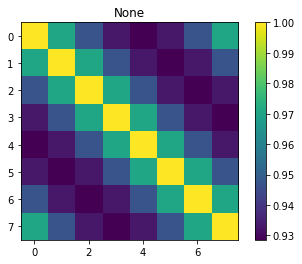

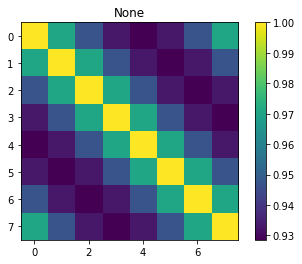

In [74]:
HPH = H @ P @ H.T
this = S @ VT @ eig_vec @ np.diag(eig_val) @ (S @ VT @ eig_vec).T
imshow(this)
imshow(HPH)

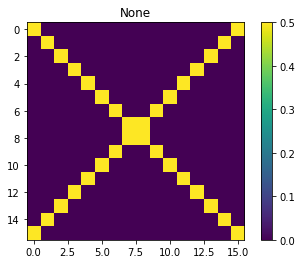

In [56]:
imshow((S @ VT @ eig_vec).conj().T @ (S @ VT @ eig_vec))

In [22]:
H_t = np.eye(dimension)[1::2]

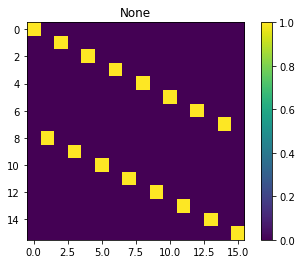

In [26]:
VT_t = np.concatenate([H, H_t], axis=0)
imshow(VT_t)

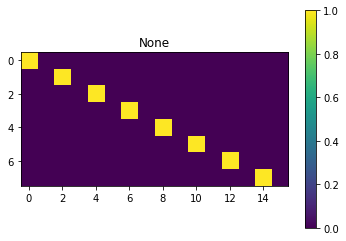

In [31]:
this = np.eye(H.shape[0]) @ H @ np.eye(H.shape[1])
imshow(this)

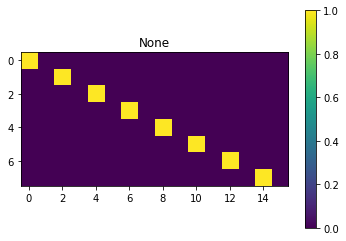

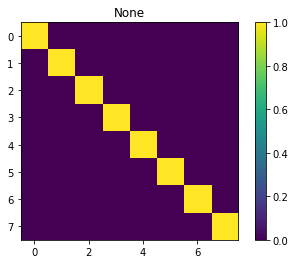

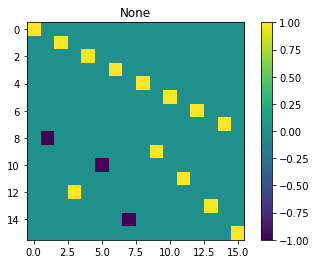

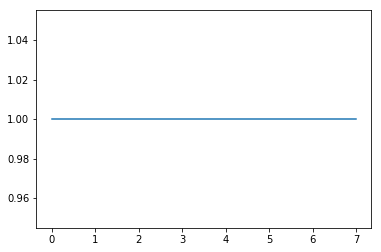

In [21]:
U, s, VT = sp.linalg.svd(H)
imshow(H)
imshow(U)
imshow(VT)
plt.figure()
plt.plot(s)

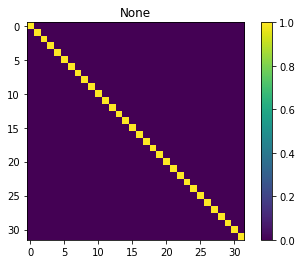

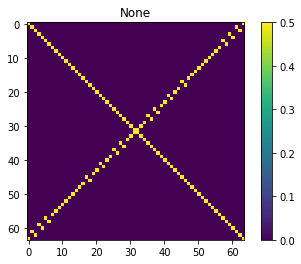

In [13]:
imshow((H @ eig_vec) @ (H @ eig_vec).conj().T)
imshow((H @ eig_vec).conj().T @ (H @ eig_vec))

In [7]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [4]:
dimension = 2**6
rho0 = 20
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

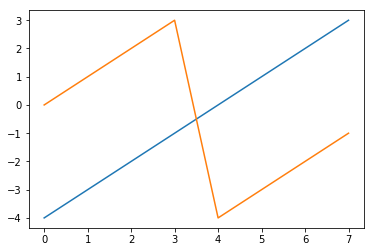

In [50]:
plt.figure()
plt.plot(k)
plt.plot(np.fft.fftshift(k))

In [68]:
print(k[1:] + dim/2)
print(k[:0:-1] + dim/2)
print(np.fft.fftshift(k) + dim/2)


[1. 2. 3. 4. 5. 6. 7.]
[7. 6. 5. 4. 3. 2. 1.]
[4. 5. 6. 7. 0. 1. 2. 3.]
[1. 2. 3.]
[5. 6. 7.]


In [62]:
print(k + dim/2)

[0. 1. 2. 3. 4. 5. 6. 7.]


/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


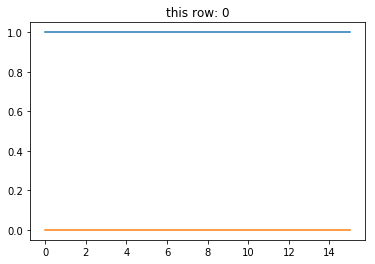

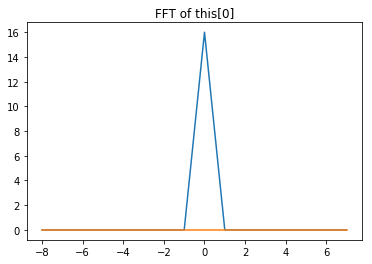

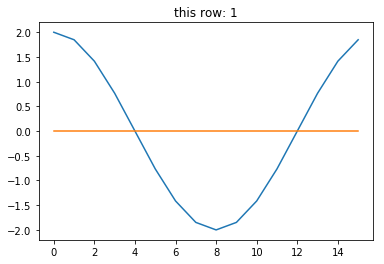

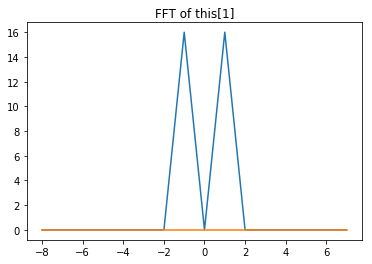

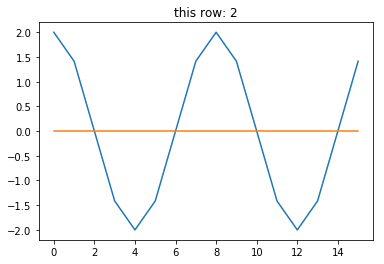

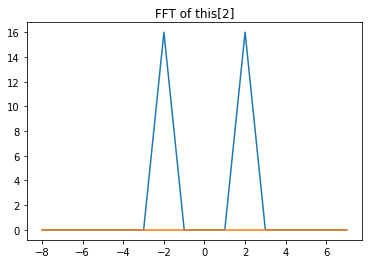

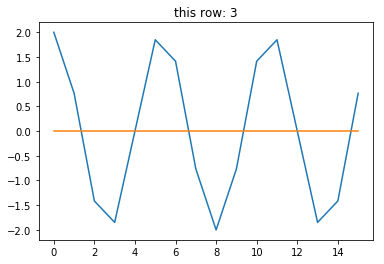

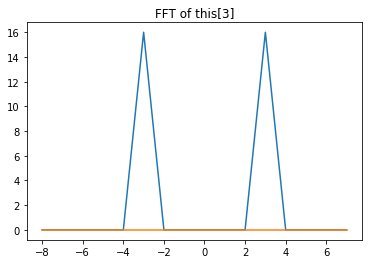

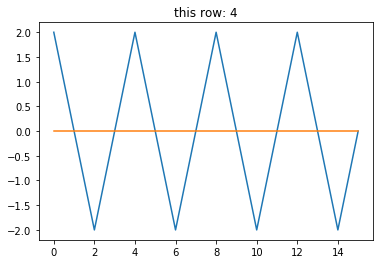

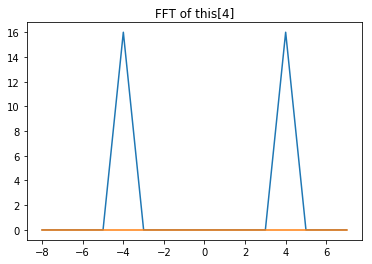

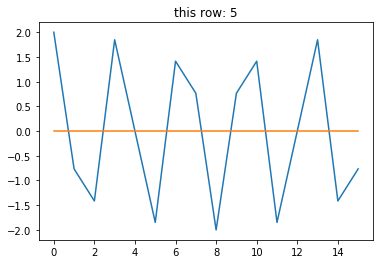

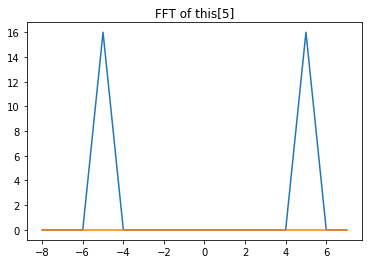

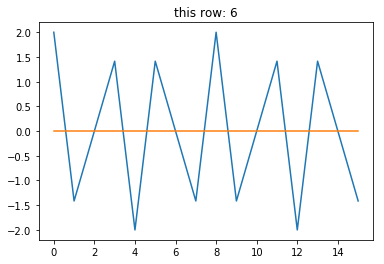

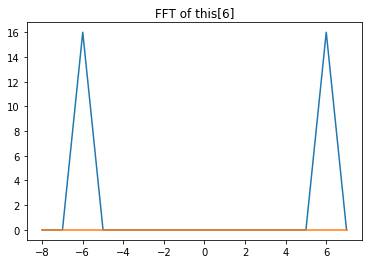

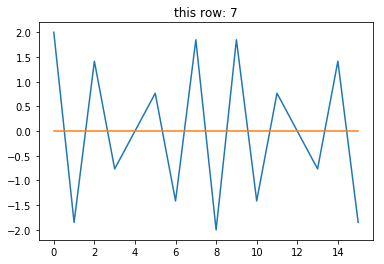

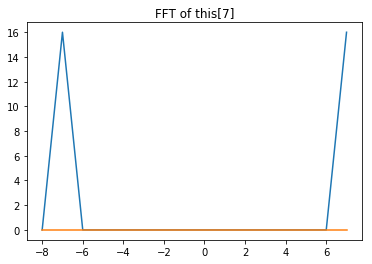

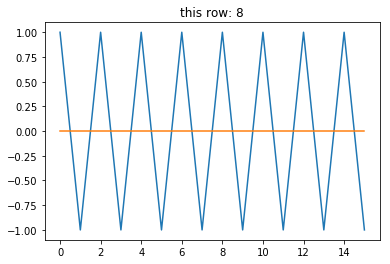

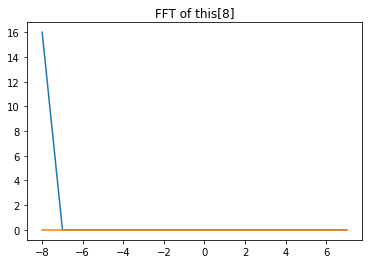

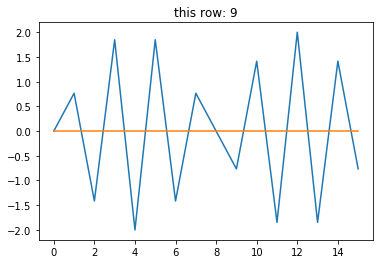

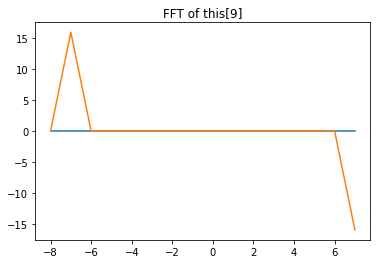

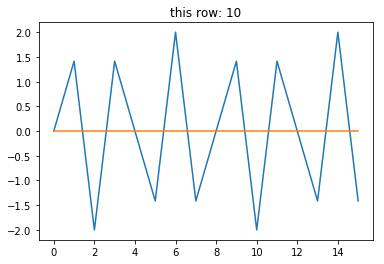

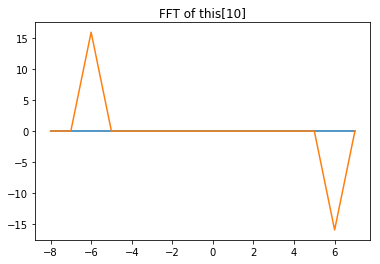

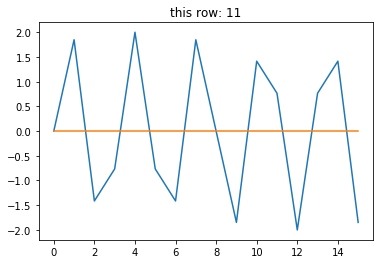

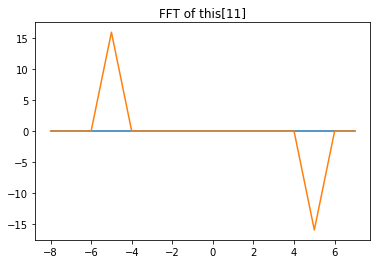

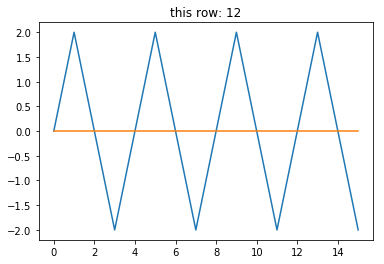

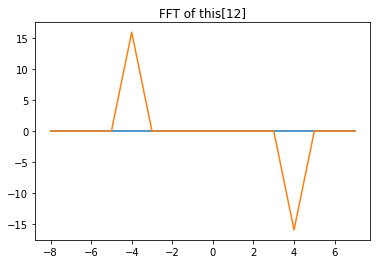

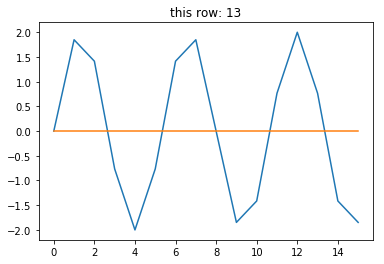

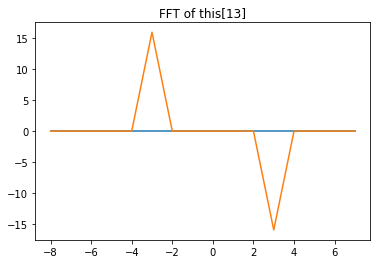

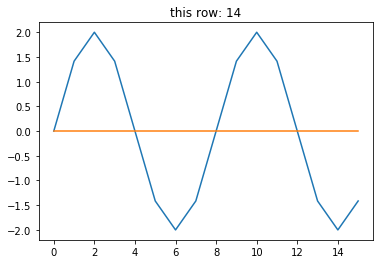

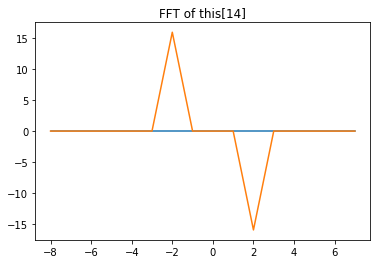

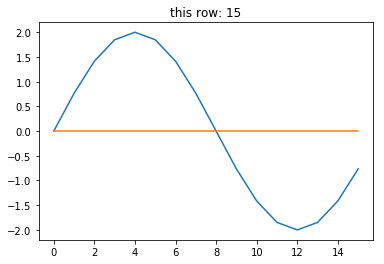

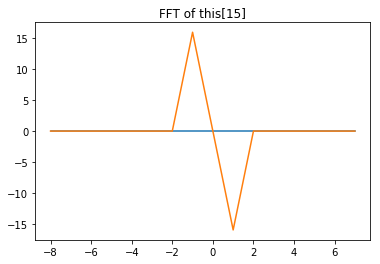

In [85]:
num = 16
dim = 16
this = np.fft.fft(np.eye(dim))
k = covariance.return_waves(dim)
k = np.fft.fftshift(k)
# for ii in range(round(num)):
#     plt.figure()
#     plt.plot(this[ii].real)
#     plt.plot(this[ii].imag)
#     plt.title(f'this row: {ii}')
    
#     v_fft = np.fft.fft(this[ii])
#     v_fft = np.fft.fftshift(v_fft)
#     plt.figure()
#     plt.plot(k, v_fft.real)
#     plt.plot(k, v_fft.imag)
#     plt.title(f'FFT of this[{ii}]')    

real = this.real
imag = this.imag
this_copy = this.copy()
this[1:]
this[1:int(dim/2)] = this_copy[1:int(dim/2)] + this_copy[1:int(dim/2)].conj()
this[int(dim/2) + 1:] = this_copy[int(dim/2) + 1:] - this_copy[int(dim/2) + 1:].conj()
this = this.real + this.imag

for ii in range(round(num)):
    plt.figure()
    plt.plot(this[ii].real)
    plt.plot(this[ii].imag)
    plt.title(f'this row: {ii}')
    
    v_fft = np.fft.fft(this[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(k, v_fft.real)
    plt.plot(k, v_fft.imag)
    plt.title(f'FFT of this[{ii}]')

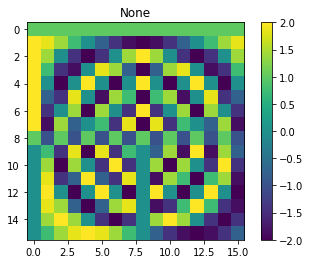

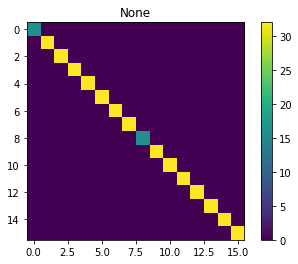

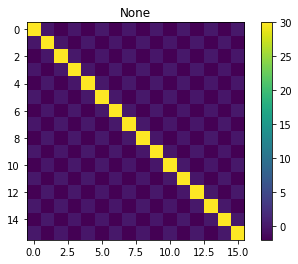

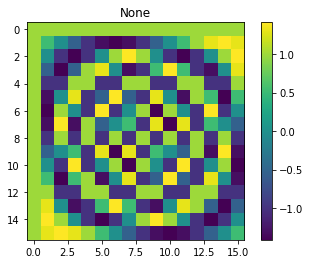

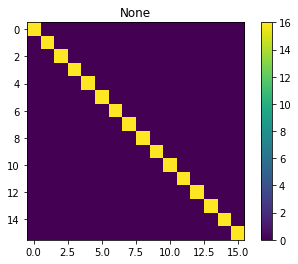

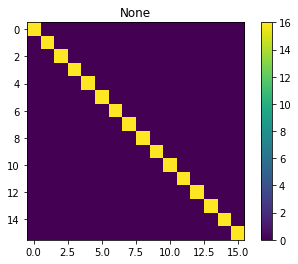

In [86]:
imshow(this)
imshow(this@this.T)
imshow(this.T @ this)

that = np.fft.fft(np.eye(dim))
that = that.real + that.imag
imshow(that)
imshow(that@that.T)
imshow(that.T@that)

In [18]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

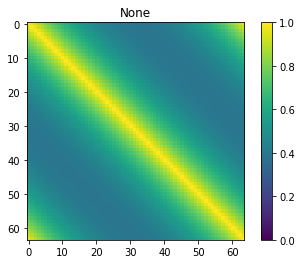

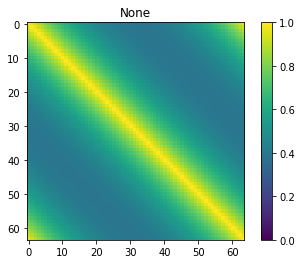

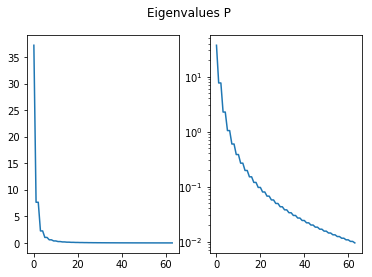

In [35]:
imshow(P, vmin=0)
imshow((eig_vec @ np.diag(eig_val) @ eig_vec.conj().T).real, vmin=0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

In [20]:
%matplotlib inline

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


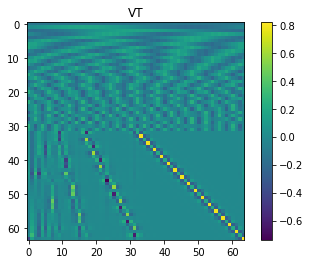

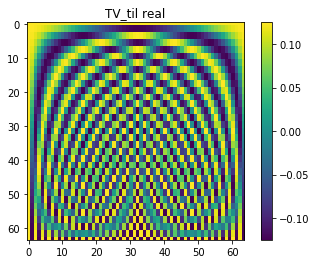

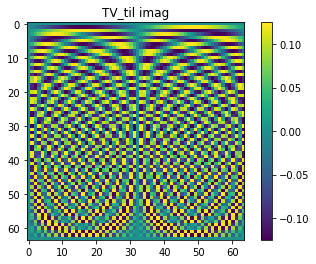

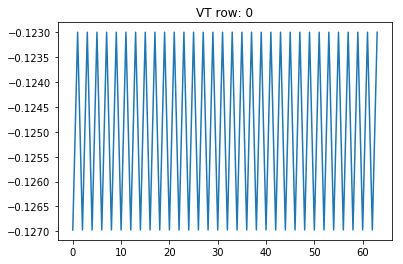

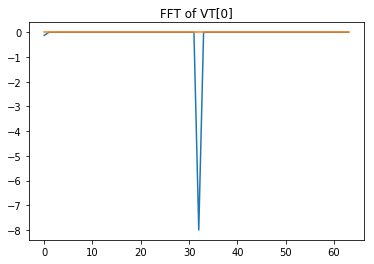

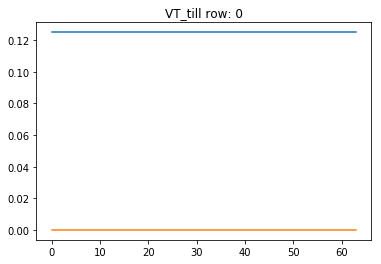

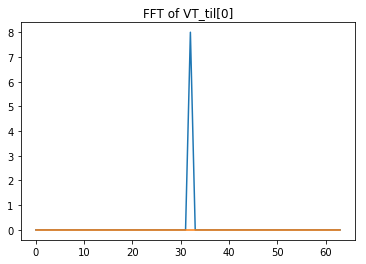

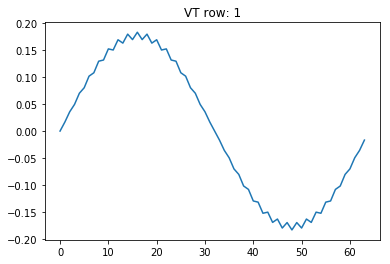

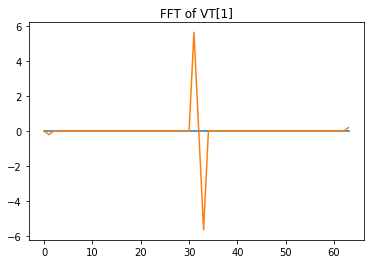

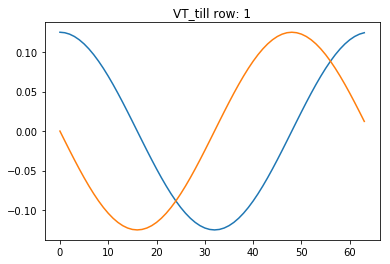

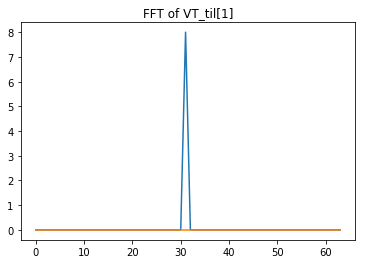

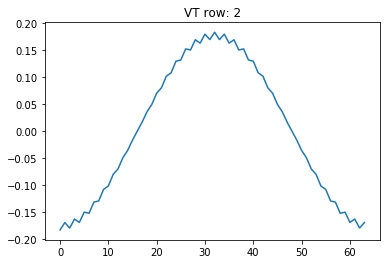

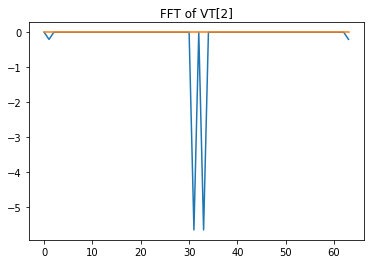

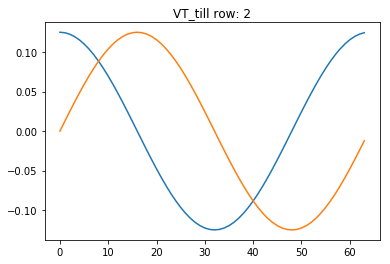

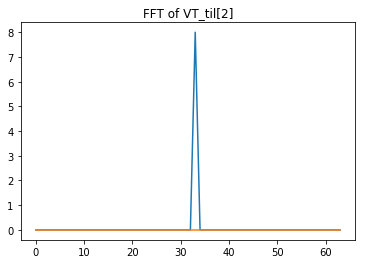

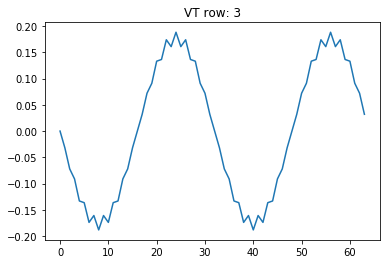

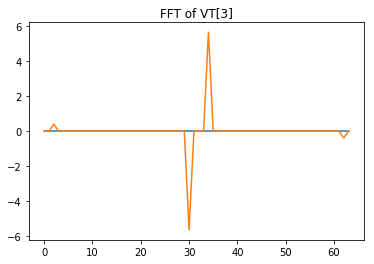

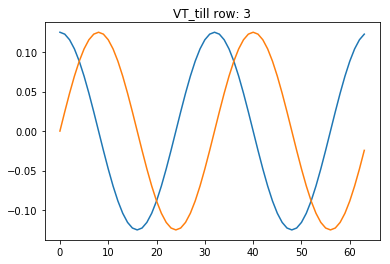

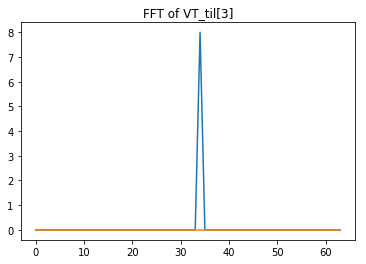

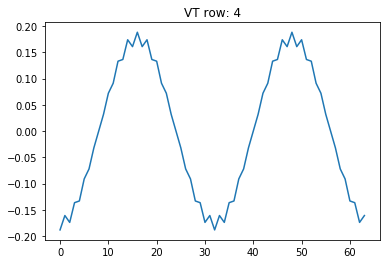

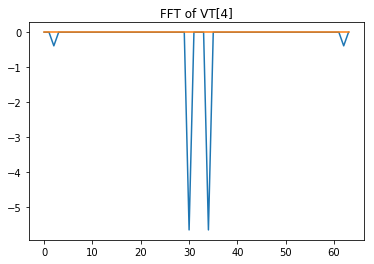

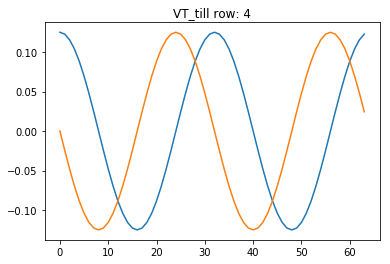

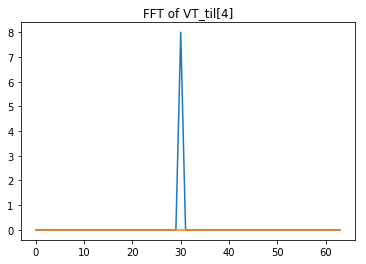

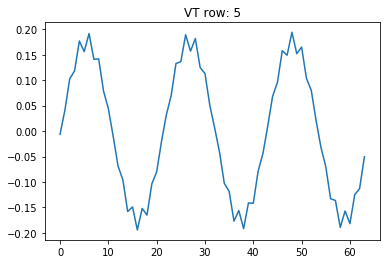

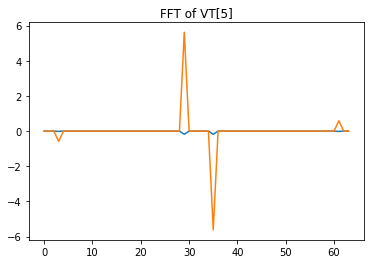

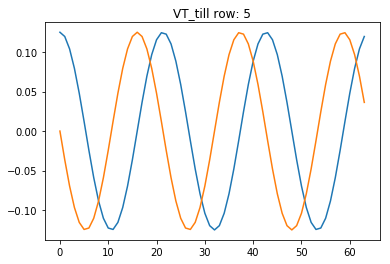

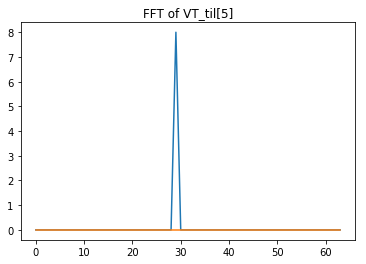

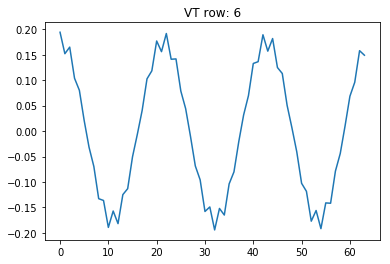

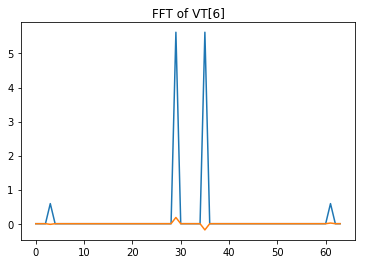

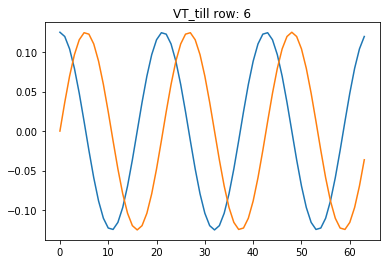

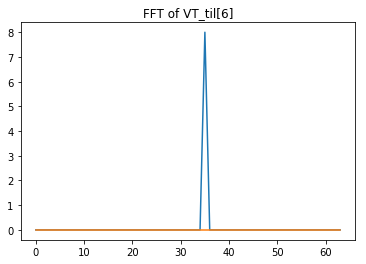

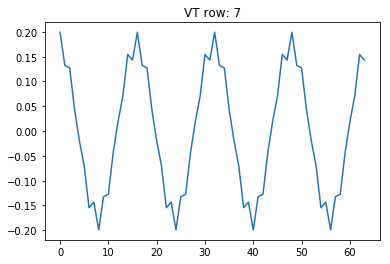

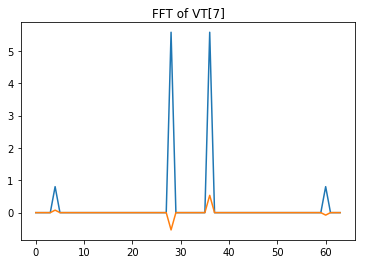

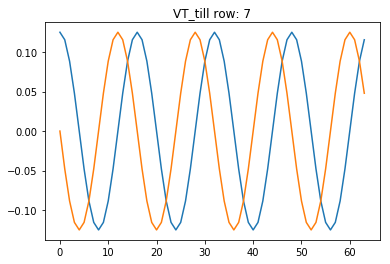

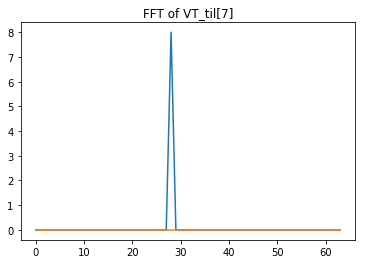

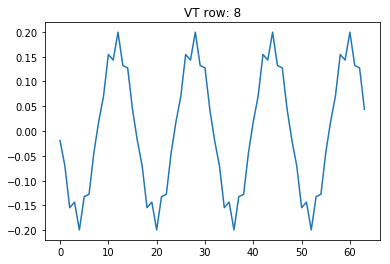

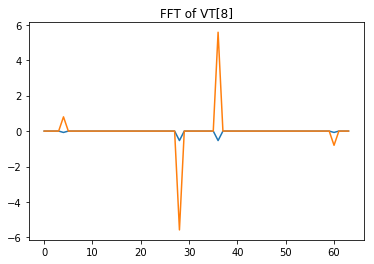

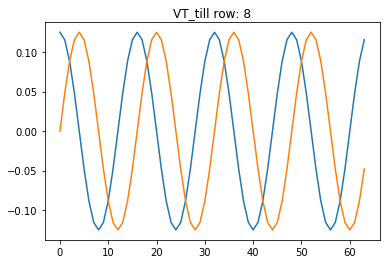

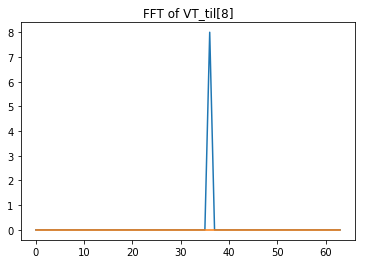

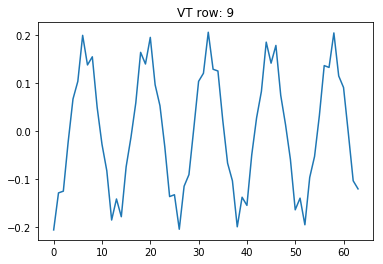

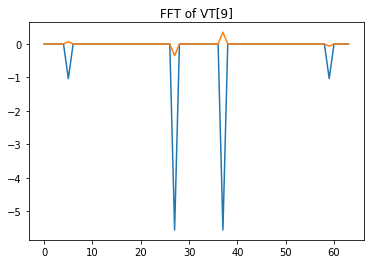

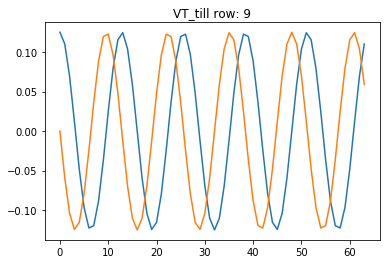

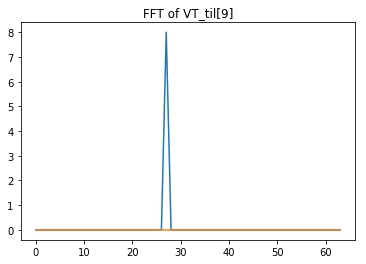

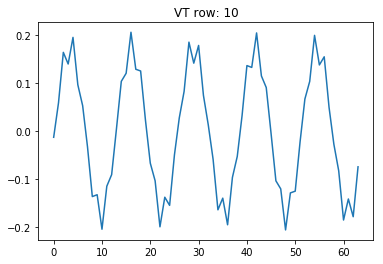

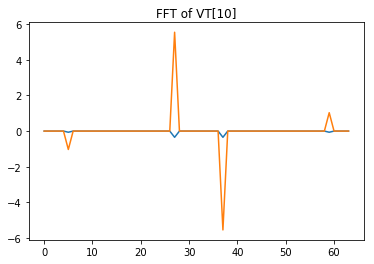

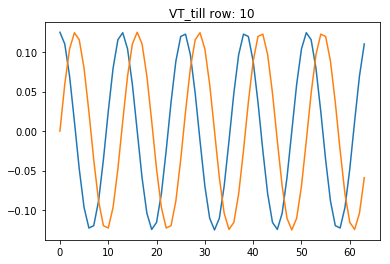

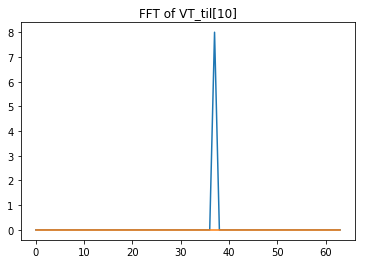

In [33]:
num = 11
# imshow(U, 'U')

# for ii in range(U.shape[1]):   
#     plt.figure()
#     plt.plot(U[:, ii])
#     plt.title(f'column: {ii}')
    
#     u_fft = np.fft.fft(U[:, ii])
#     plt.figure()
#     plt.plot(u_fft.real)
#     plt.plot(u_fft.imag)
#     plt.title(f'VT row: {ii}')

# VT_til = eig_vec.T
VT_til = eig_vec.T

imshow(VT, 'VT')
imshow(VT_til.real, 'TV_til real')
imshow(VT_til.imag, 'TV_til imag')

for ii in range(round(num)):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}')
    
    v_fft = np.fft.fft(VT[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(v_fft.real)
    plt.plot(v_fft.imag)
    plt.title(f'FFT of VT[{ii}]')
    
    plt.figure()
    plt.plot(VT_til[ii].real)
    plt.plot(VT_til[ii].imag)
    plt.title(f'VT_till row: {ii}')
    
    v_fft = np.fft.fft(VT_til[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(v_fft.real)
    plt.plot(v_fft.imag)
    plt.title(f'FFT of VT_til[{ii}]')

In [187]:
%matplotlib inline

In [188]:
dimension = 100
rho0 = 10
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [190]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

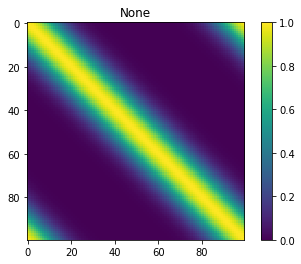

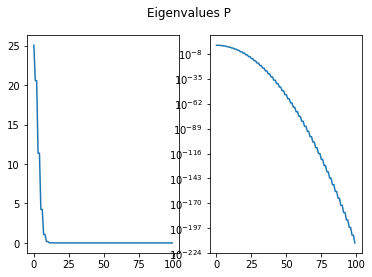

In [192]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

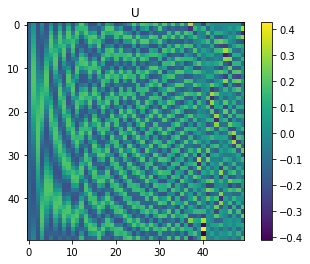

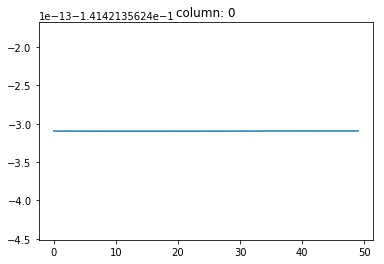

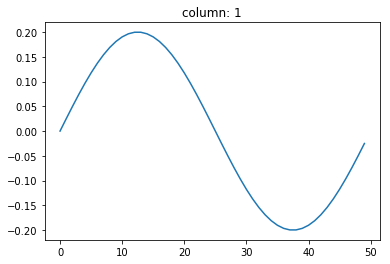

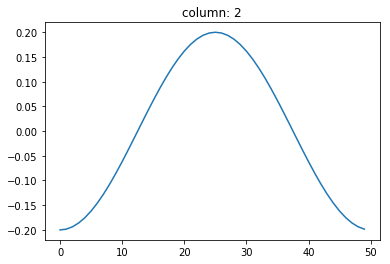

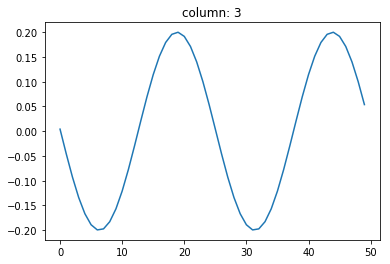

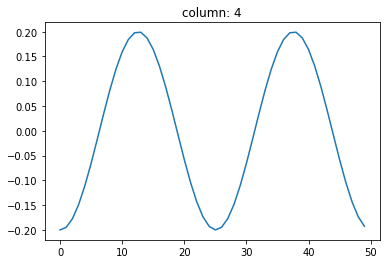

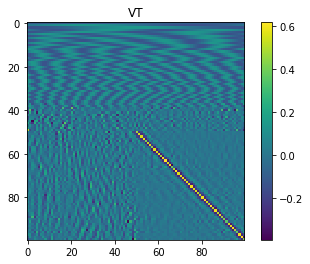

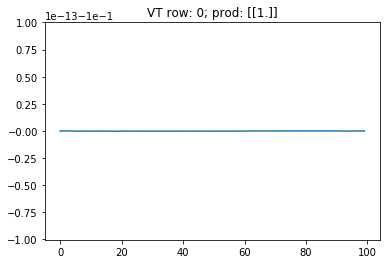

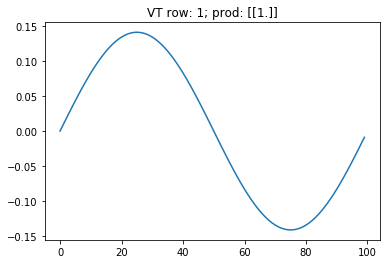

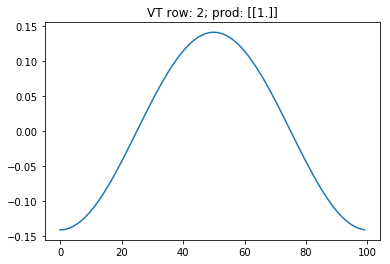

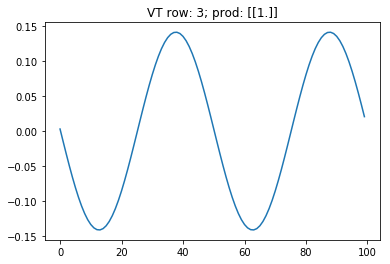

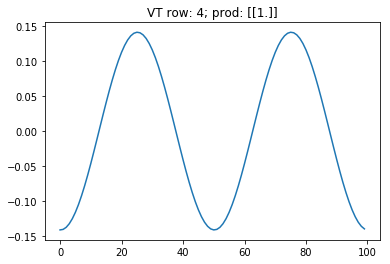

In [193]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


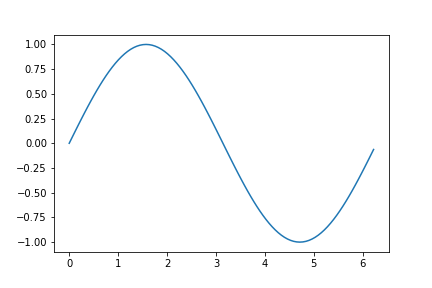

<IPython.core.display.Javascript object>


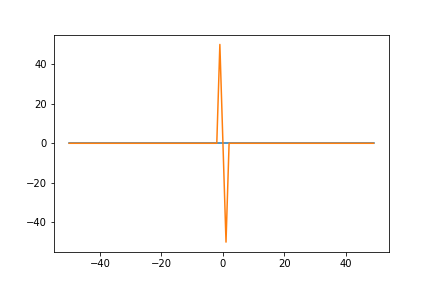

In [48]:
N = 100
x = np.arange(100)*2*np.pi/N
sin = np.sin(x)
fft = np.fft.fft(sin)
fft = np.fft.fftshift(fft)
k = np.arange(-N/2, N/2)

plt.figure()
plt.plot(x, sin)

plt.figure()
plt.plot(k, fft.real)
plt.plot(k, fft.imag)